# Set up

In [3]:
from google.cloud import bigquery
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from footbot.data.utils import write_to_table

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../secrets/service_account.json'
client = bigquery.Client()

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
%matplotlib inline

# Getting data

In [7]:
sql = \
'''
SELECT
  eg.element,
  e.safe_web_name,
  e.element_type,
  AVG(total_points) AS avg_total_points,
  STDDEV_SAMP(total_points) AS std_total_points,
  MAX(total_points) AS max_total_points,
  AVG(value) AS avg_value,
  AVG(total_points)/AVG(value) AS avg_points_value,
  AVG(bps) AS avg_bps,
  AVG(bonus) AS avg_bonus,
  AVG(goals_scored) AS avg_goals_scored,
  AVG(minutes) AS avg_minutes,
  AVG(clean_sheets) AS avg_clean_sheets,
  AVG(completed_passes) AS avg_completed_passes,
  AVG(recoveries) AS avg_recoveries,
  AVG(assists) AS avg_assists,
  AVG(key_passes) AS avg_key_passes,
  AVG(winning_goals) AS avg_winning_goals,
  AVG(tackled) AS avg_tackled,
  AVG(dribbles) AS avg_dribbles,
  AVG(clearances_blocks_interceptions) AS avg_clearances_blocks_interceptions,
  AVG(big_chances_created) AS avg_big_chances_created,
  AVG(target_missed) AS avg_target_missed,
  AVG(fouls) AS avg_fouls,
  AVG(tackles) AS avg_tackles,
  AVG(open_play_crosses) AS avg_open_play_crosses,
  AVG(offside) AS avg_offside,
  AVG(big_chances_missed) AS avg_big_chances_missed,
  AVG(saves) AS avg_saves,
  AVG(goals_conceded) AS avg_goals_conceded,
  AVG(attempted_passes) AS avg_attempted_passes,
  AVG(errors_leading_to_goal) AS avg_errors_leading_to_goal,
  AVG(errors_leading_to_goal_attempt) AS avg_errors_leading_to_goal_attempt,
  AVG(own_goals) AS avg_own_goals,
  AVG(penalties_conceded) AS avg_penalties_conceded,
  AVG(penalties_missed) AS avg_penalties_missed,
  AVG(penalties_saved) AS avg_penalties_saved,
  AVG(red_cards) AS avg_red_cards,
  AVG(yellow_cards) AS avg_yellow_cards,
  AVG(big_chances_missed + goals_scored) AS avg_big_chances,
  AVG(saves + goals_conceded) AS avg_shots_conceded
FROM
  `fpl.element_gameweeks_1819` AS eg
INNER JOIN
  `fpl.elements_1819` AS e
ON
  eg.element = e.element
GROUP BY
  1,
  2,
  3
ORDER BY
  1
'''

df = client.query(sql).to_dataframe()

In [8]:
df.head()

,element,safe_web_name,element_type,avg_total_points,std_total_points,max_total_points,avg_value,avg_points_value,avg_bps,avg_bonus,avg_goals_scored,avg_minutes,avg_clean_sheets,avg_completed_passes,avg_recoveries,avg_assists,avg_key_passes,avg_winning_goals,avg_tackled,avg_dribbles,avg_clearances_blocks_interceptions,avg_big_chances_created,avg_target_missed,avg_fouls,avg_tackles,avg_open_play_crosses,avg_offside,avg_big_chances_missed,avg_saves,avg_goals_conceded,avg_attempted_passes,avg_errors_leading_to_goal,avg_errors_leading_to_goal_attempt,avg_own_goals,avg_penalties_conceded,avg_penalties_missed,avg_penalties_saved,avg_red_cards,avg_yellow_cards,avg_big_chances,avg_shots_conceded
0,1,cech,1,0.631579,1.937134,11,48.631579,0.012987,3.421053,0.078947,0.000000,15.394737,0.026316,4.026316,1.631579,0.000000,0.000000,0.0,0.000000,0.000000,0.210526,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.710526,0.236842,5.868421,0.000000,0.052632,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.947368
1,2,leno,1,2.789474,2.182955,9,48.315789,0.057734,14.947368,0.131579,0.000000,74.605263,0.157895,16.789474,7.815789,0.000000,0.000000,0.0,0.026316,0.000000,0.894737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.763158,1.105263,24.263158,0.105263,0.026316,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,3.868421
2,3,koscielny,2,1.631579,3.291439,15,54.131579,0.030141,8.394737,0.210526,0.078947,34.973684,0.078947,21.552632,2.078947,0.000000,0.052632,0.0,0.078947,0.026316,2.947368,0.000000,0.026316,0.236842,0.289474,0.000000,0.000000,0.026316,0.000000,0.605263,23.421053,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.026316,0.105263,0.605263
3,4,bellerin,2,1.578947,2.747299,11,54.000000,0.029240,8.000000,0.131579,0.000000,40.315789,0.105263,17.342105,2.078947,0.131579,0.210526,0.0,0.631579,0.368421,1.447368,0.105263,0.157895,0.421053,0.315789,0.236842,0.026316,0.000000,0.000000,0.552632,20.605263,0.000000,0.078947,0.026316,0.0,0.0,0.0,0.0,0.078947,0.000000,0.552632
4,5,monreal,2,2.026316,2.736014,10,54.342105,0.037288,10.315789,0.184211,0.026316,48.947368,0.131579,26.894737,2.605263,0.105263,0.289474,0.0,0.263158,0.184211,2.368421,0.105263,0.052632,0.447368,0.210526,0.105263,0.026316,0.026316,0.000000,0.631579,30.763158,0.026316,0.000000,0.000000,0.0,0.0,0.0,0.0,0.131579,0.052632,0.631579


In [9]:
df_all = df.copy()

In [10]:
df = df[
    (df['avg_minutes'] > 45)
    & (df['element_type'].isin([2, 3, 4]))
]

# Analysing data

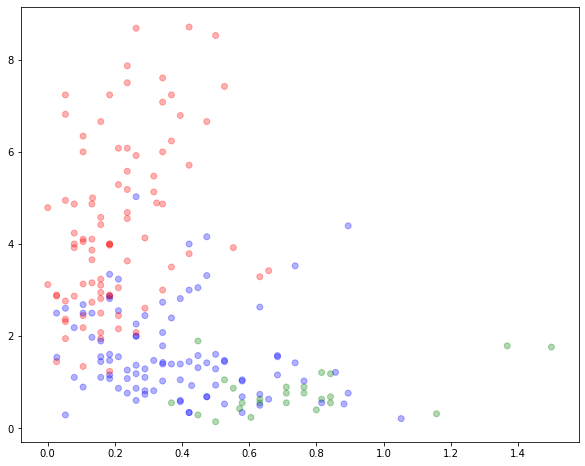

In [11]:
col_dict = {
    1: 'y',
    2: 'r',
    3: 'b',
    4: 'g'
}

plt.figure(figsize=(10, 8))
plt.scatter(
    df['avg_target_missed'],
    df['avg_clearances_blocks_interceptions'],
    alpha=.3,
    c=df['element_type'].apply(lambda x: col_dict[x])
)
plt.show()

In [12]:
df.groupby('element_type').mean()

,element,avg_total_points,std_total_points,max_total_points,avg_value,avg_points_value,avg_bps,avg_bonus,avg_goals_scored,avg_minutes,avg_clean_sheets,avg_completed_passes,avg_recoveries,avg_assists,avg_key_passes,avg_winning_goals,avg_tackled,avg_dribbles,avg_clearances_blocks_interceptions,avg_big_chances_created,avg_target_missed,avg_fouls,avg_tackles,avg_open_play_crosses,avg_offside,avg_big_chances_missed,avg_saves,avg_goals_conceded,avg_attempted_passes,avg_errors_leading_to_goal,avg_errors_leading_to_goal_attempt,avg_own_goals,avg_penalties_conceded,avg_penalties_missed,avg_penalties_saved,avg_red_cards,avg_yellow_cards,avg_big_chances,avg_shots_conceded
element_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,259.613636,2.377544,2.816317,10.454545,48.884019,0.047825,12.927471,0.192980,0.032624,66.899392,0.201823,27.996558,3.989491,0.052664,0.393944,0.008987,0.532693,0.316460,4.405638,0.063856,0.210942,0.601170,0.495946,0.189641,0.046679,0.027512,0.0,1.054342,34.406181,0.013182,0.028577,0.006280,0.014354,0.000000,0.0,0.004948,0.113988,0.060136,1.054342
3,278.216495,2.737721,2.681068,11.298969,58.390656,0.046196,11.164163,0.203482,0.117067,63.107915,0.215481,26.362225,4.208680,0.114101,0.937273,0.031495,1.577055,0.804901,1.610417,0.134890,0.383462,0.756974,0.478888,0.235402,0.131522,0.078570,0.0,0.950162,32.113180,0.004891,0.017317,0.000814,0.003534,0.002984,0.0,0.004341,0.117162,0.195638,0.950162
4,278.520000,3.713363,3.646539,13.720000,75.357373,0.051062,12.221434,0.468782,0.320401,66.311569,0.220551,13.237995,2.189704,0.148571,0.805414,0.091840,2.189424,0.773774,0.784120,0.150596,0.740120,0.925173,0.225063,0.092632,0.573694,0.272882,0.0,1.039248,18.431649,0.000000,0.006015,0.001053,0.004211,0.004211,0.0,0.005263,0.078947,0.593283,1.039248


In [13]:
cols = [
    'avg_big_chances',
    'avg_offside',
    'avg_big_chances_created',
    'avg_key_passes',
    'avg_clearances_blocks_interceptions',
    'avg_errors_leading_to_goal_attempt',
]

X = df[cols].to_numpy()

In [14]:
kmeans = KMeans(
    n_clusters=3,
    n_init=100
).fit(X)
df['cluster'] = kmeans.labels_

In [15]:
df[['safe_web_name', 'element_type', 'cluster']].sort_values(['cluster', 'element_type', 'safe_web_name'])

,safe_web_name,element_type,cluster
50,bong,2,0
196,hadergjonaj,2,0
7,kolasinac,2,0
192,lowe,2,0
246,robertson,2,0
353,rose,2,0
364,alli,3,0
586,almiron,3,0
507,andre gomes,3,0
414,antonio,3,0


In [16]:
pd.DataFrame(kmeans.cluster_centers_, columns=cols)

,avg_big_chances,avg_offside,avg_big_chances_created,avg_key_passes,avg_clearances_blocks_interceptions,avg_errors_leading_to_goal_attempt
0,0.308498,0.263364,0.154611,0.973409,1.066025,0.013040
1,0.069094,0.041316,0.074561,0.539152,3.173085,0.021564
2,0.073870,0.038051,0.036940,0.211425,6.286471,0.040614


In [17]:
df.groupby(['cluster', 'element_type']).size()

cluster  element_type
0        2                6
         3               71
         4               25
1        2               47
         3               25
2        2               35
         3                1
dtype: int64

In [17]:
# X_all = df_all[df_all.element_type.isin([2, 3, 4])][cols].to_numpy()
# clusters_all = kmeans.predict(X_all) + 1
# df_all['cluster'] = 4
# df_all.loc[df_all.element_type.isin([2, 3, 4]),'cluster'] = clusters_all

# df_all[['element', 'cluster']].sample(10)

,element,cluster
253,254,2
80,81,2
180,181,3
487,488,2
440,441,2
329,330,1
567,568,2
467,468,4
208,209,2
489,490,4


In [18]:
write_to_table(
    'fpl',
    'element_clusters_1819',
    df_all[['element', 'cluster']],
    write_disposition='WRITE_EMPTY',
    secrets_path='../secrets/service_account.json',
    csvs_path='../csvs/'
)